In [6]:
%matplotlib inline

from plotting import plot_surf_stat_map, crop_img, create_fig
import pandas as pd
import matplotlib.pyplot as plt
import glob, os, time, datetime
import numpy as np
import seaborn as sns
sns.set_context('talk')

In [2]:
docDir = '/afs/cbs.mpg.de/projects/mar005_lsd-lemon-surf/documents'
df = pd.read_pickle(max(glob.iglob('%s/data_grouplevel/data_grouplevel_20*.pkl' % docDir), 
                        key=os.path.getctime))
df = df[df['sample'] == 'all subjects']

# Group-level meanDist maps

## distribution of group averages for each hemisphere across thresholds

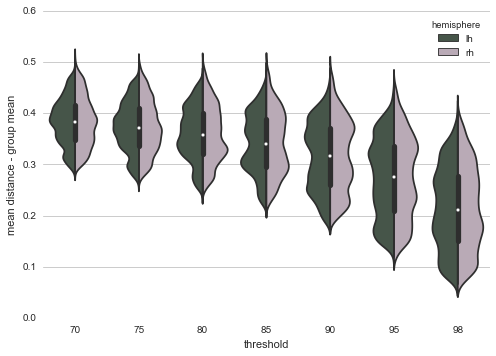

In [3]:
sns.set(style="whitegrid")
pal = sns.color_palette('cubehelix', 2, .3)

data = df[(df['networks of sample (7 networks solution)'] != 'medial wall') 
          & (df['sample'] == 'all subjects')]

sns.violinplot(x='threshold', y='mean distance - group mean', hue='hemisphere', 
               data=data, split=True, palette=pal)
sns.despine(left=True, bottom=True)

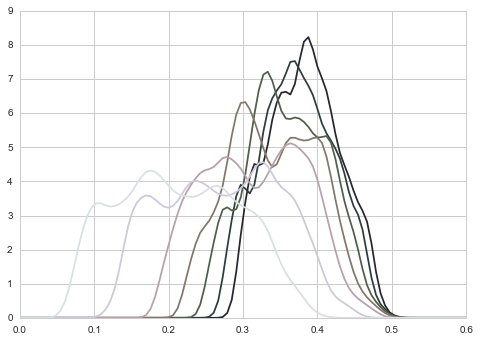

In [4]:
# ToDo: change color code and make legend, add x and y labels

sns.set(style="whitegrid")
thrs = [70,75,80,85,90,95,98]

pal = sns.color_palette('cubehelix', len(thrs), .3)

for n,thr in enumerate(thrs):
    ax = sns.kdeplot(df['mean distance - group mean'][
            (df['networks of sample (7 networks solution)'] != 'medial wall') 
            & (df['threshold'] == str(thr))
            & (df['sample'] == 'all subjects')],
                    legend=False,
                    clip=(0,.6),
                    color=pal[n])

plt.show()
#clf()

## group averages for each hemisphere across thresholds projected to the surface


75, rh


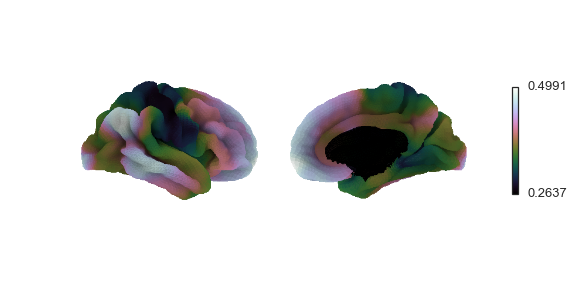


75, rh


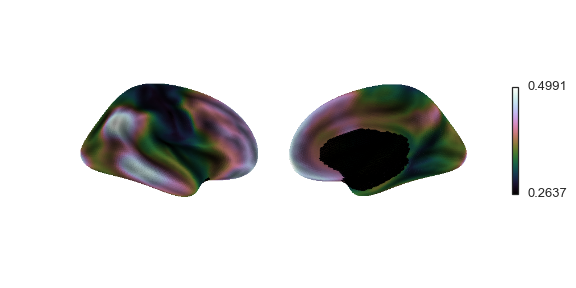


75, lh


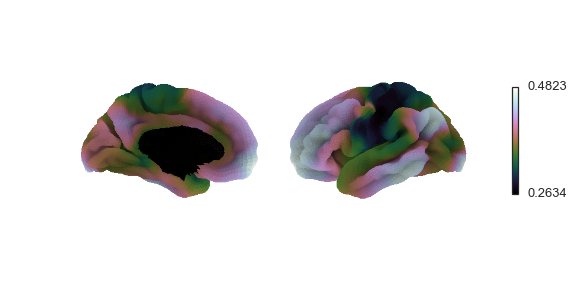


75, lh


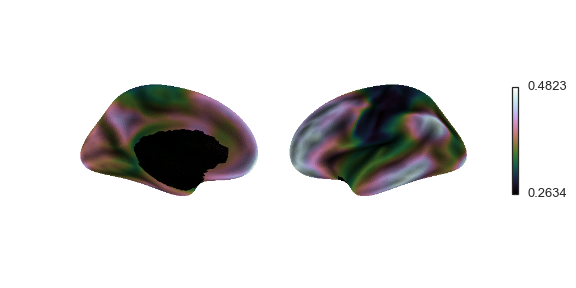


80, rh


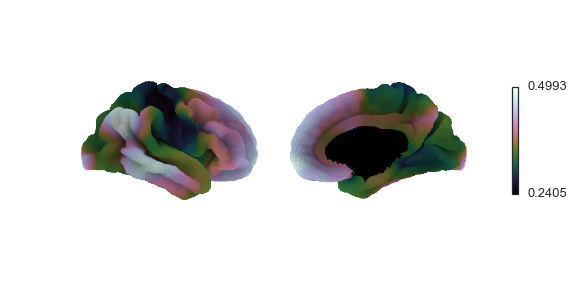


80, rh


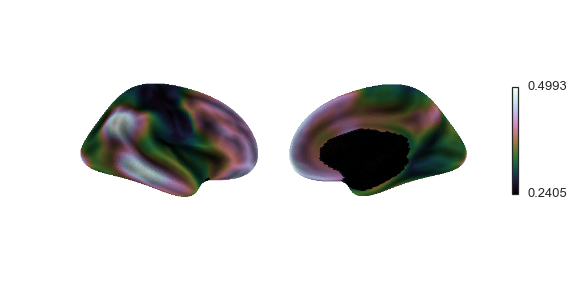


80, lh


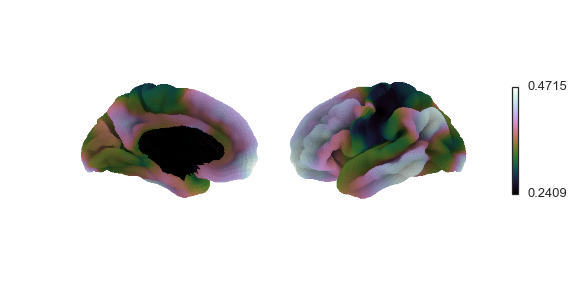


80, lh


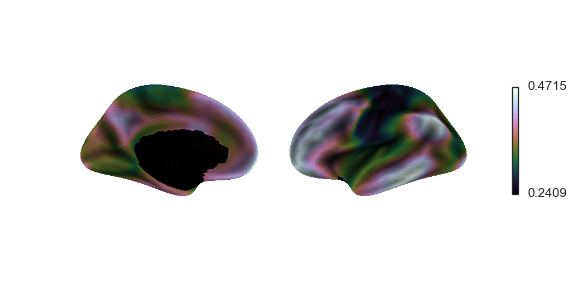


85, rh


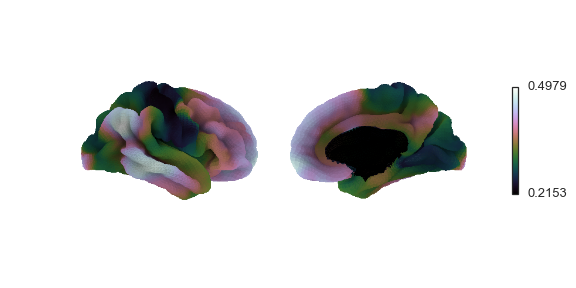


85, rh


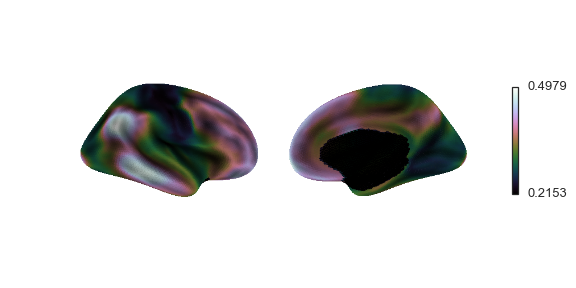


85, lh


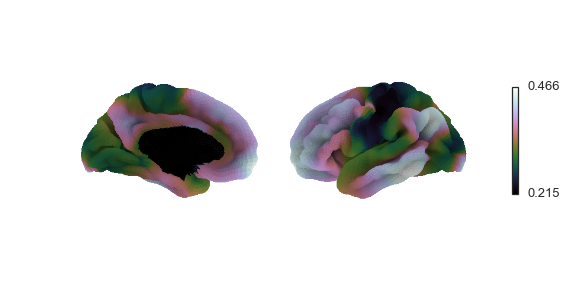


85, lh


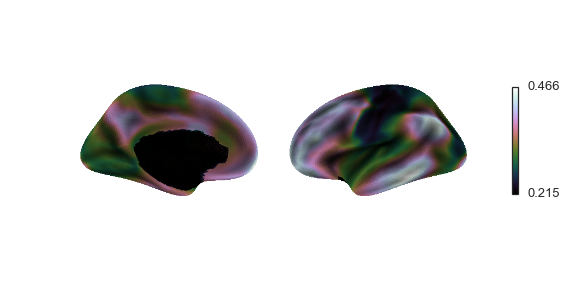


90, rh


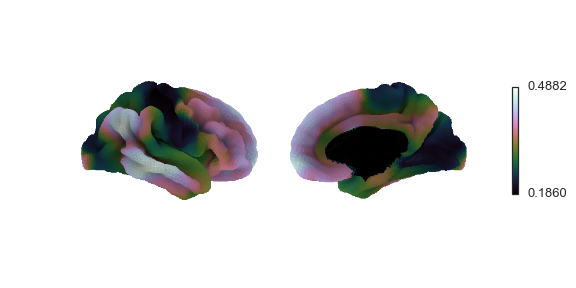


90, rh


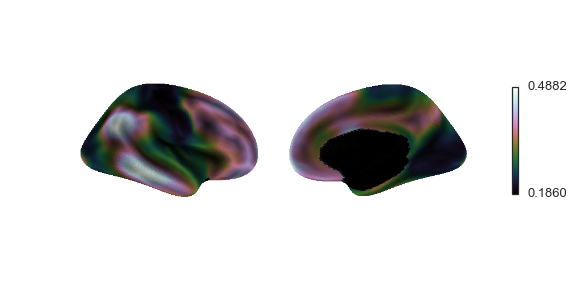


90, lh


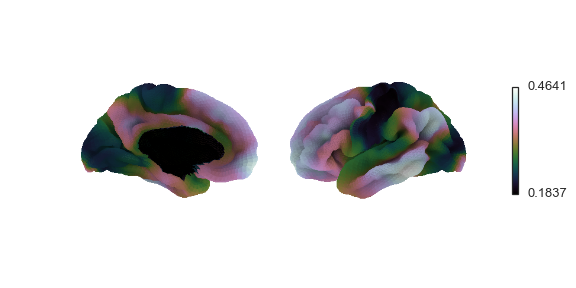


90, lh


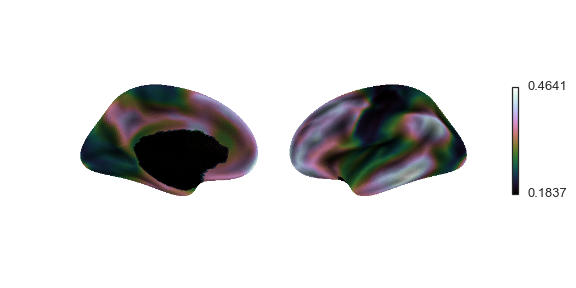


95, rh


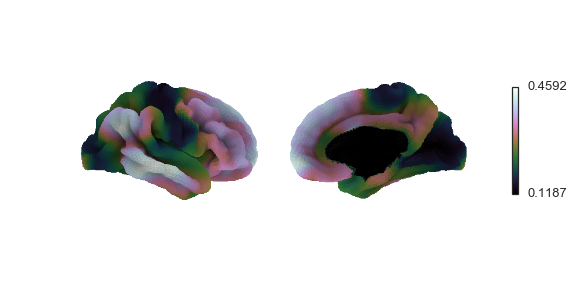


95, rh


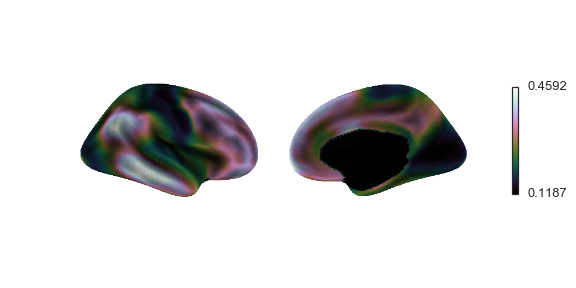


95, lh


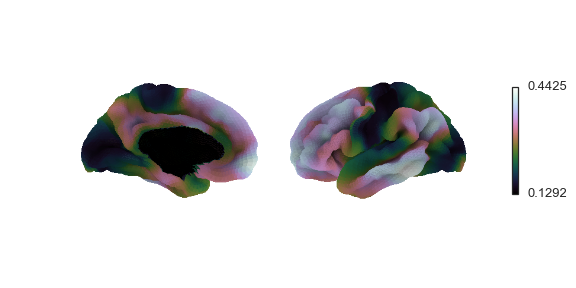


95, lh


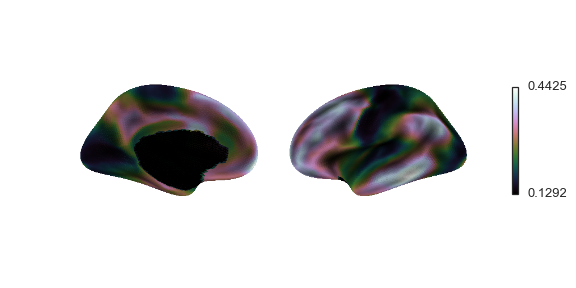


98, rh


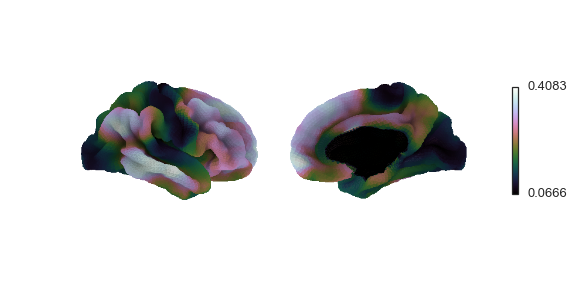


98, rh


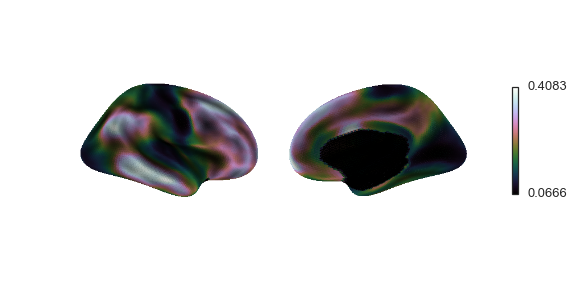


98, lh


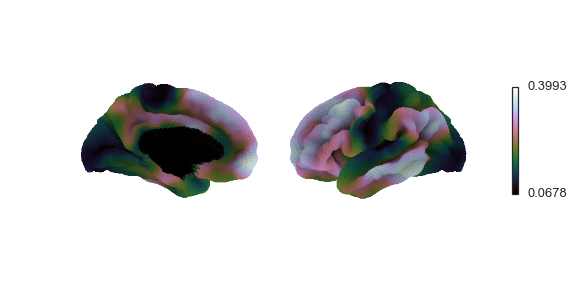


98, lh


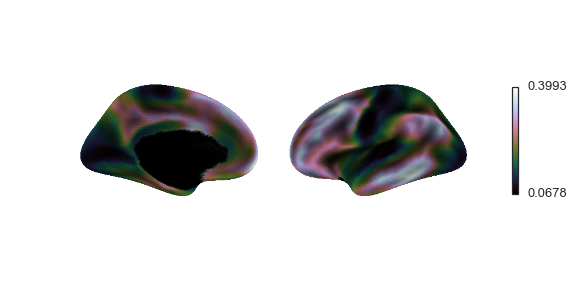

In [7]:
for thr in [75, 80, 85, 90, 95, 98]:
    for hemi in ['rh', 'lh']:
        for surf in ['pial', 'inflated']:
            print '\n%s, %s' % (thr, hemi)
            data = np.array(df['mean distance - group mean'][(df['threshold'] == str(thr)) 
                                                             & (df['hemisphere'] == hemi)])
            create_fig(data, hemi, surf=surf, cmap='cubehelix')


## distribution of normalized group averages for each hemisphere across thresholds

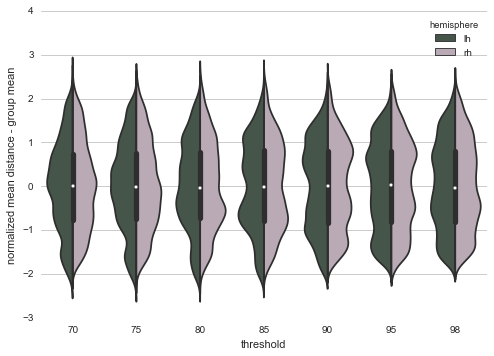

In [8]:
sns.set(style="whitegrid")
pal = sns.color_palette('cubehelix', 2, .3)

data = df[(df['networks of sample (7 networks solution)'] != 'medial wall') 
          & (df['sample'] == 'all subjects')]

sns.violinplot(x='threshold', y='normalized mean distance - group mean', hue='hemisphere', 
               data=data, split=True, palette=pal)
sns.despine(left=True, bottom=True)

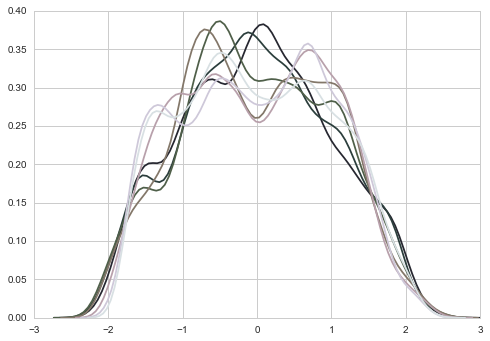

In [9]:
# ToDo: change color code and make legend, add x and y labels

sns.set(style="whitegrid")
thrs = [70,75,80,85,90,95,98]

pal = sns.color_palette('cubehelix', len(thrs), .3)

for n,thr in enumerate(thrs):
    ax = sns.kdeplot(df['normalized mean distance - group mean'][
            (df['networks of sample (7 networks solution)'] != 'medial wall') 
            & (df['threshold'] == str(thr))
            & (df['sample'] == 'all subjects')],
                     legend=False,
                     clip=(-3,3),
                     color=pal[n])
plt.show()
#clf()

## Variance in the sample (--> coefficient of variation)

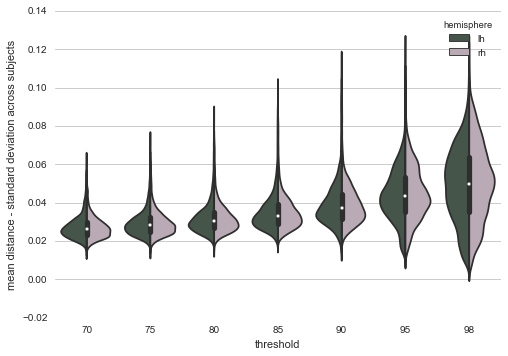

In [10]:
sns.set(style="whitegrid")
pal = sns.color_palette('cubehelix', 2, .3)

data = df[(df['networks of sample (7 networks solution)'] != 'medial wall') 
          & (df['sample'] == 'all subjects')]

sns.violinplot(x='threshold', y='mean distance - standard deviation across subjects', hue='hemisphere', 
               data=data, split=True, palette=pal)
sns.despine(left=True, bottom=True)


75, rh


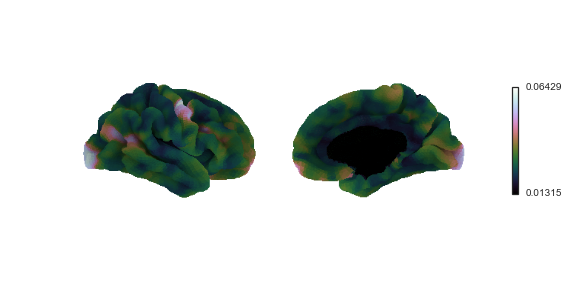


75, rh


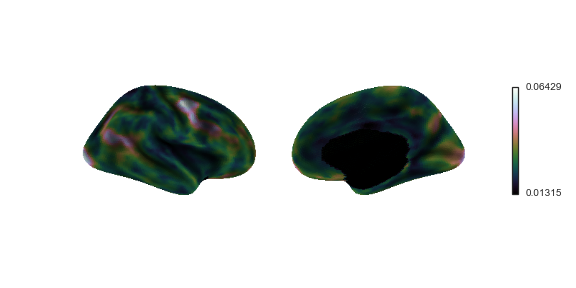


75, lh


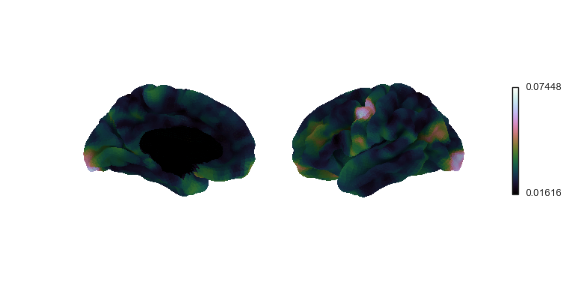


75, lh


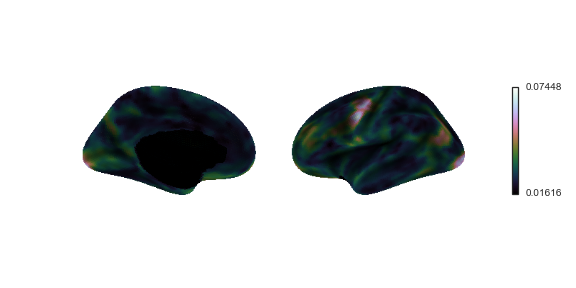


80, rh


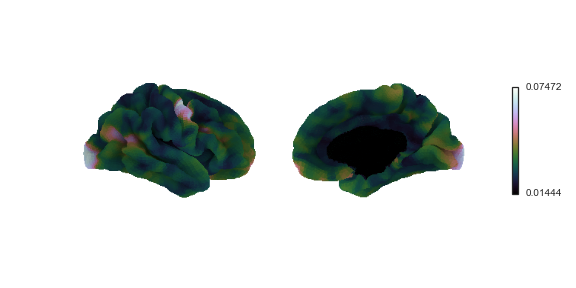


80, rh


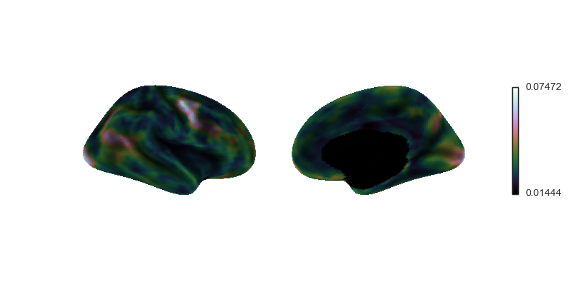


80, lh


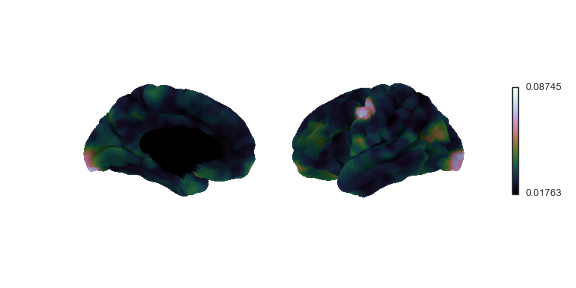


80, lh


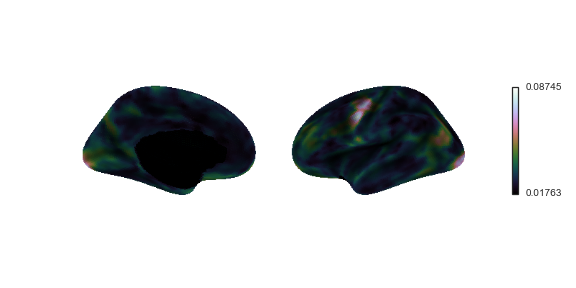


85, rh


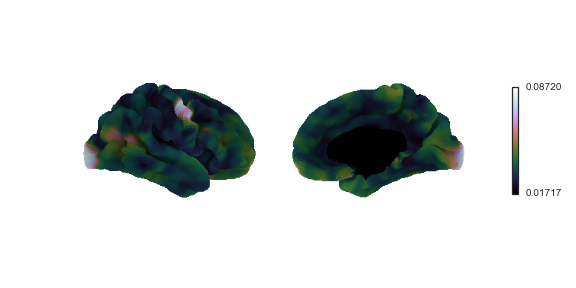


85, rh


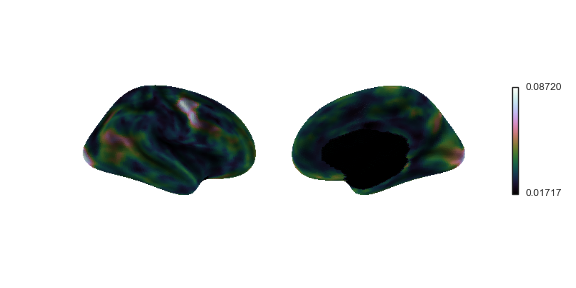


85, lh


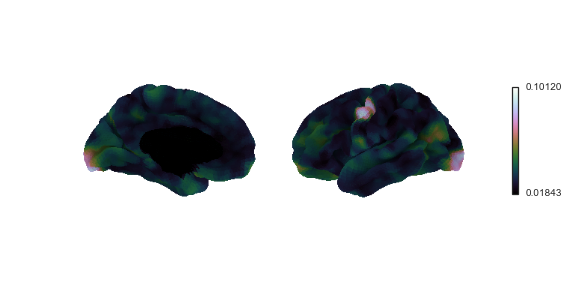


85, lh


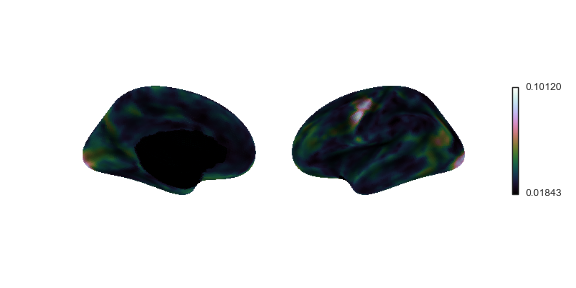


90, rh


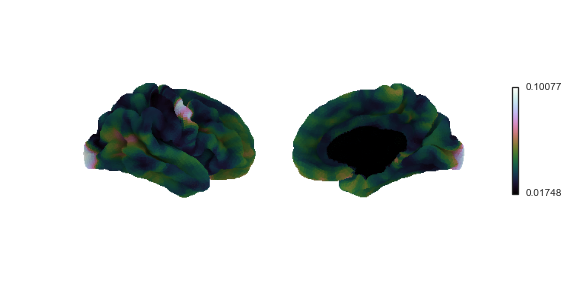


90, rh


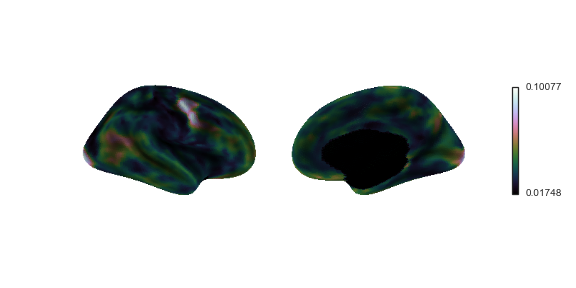


90, lh


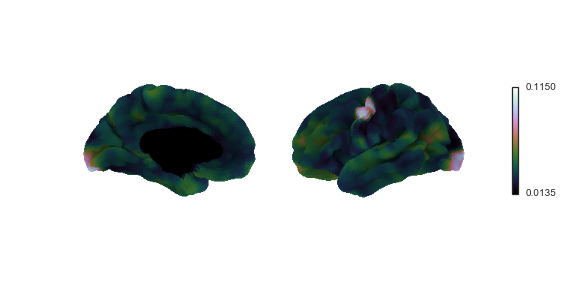


90, lh


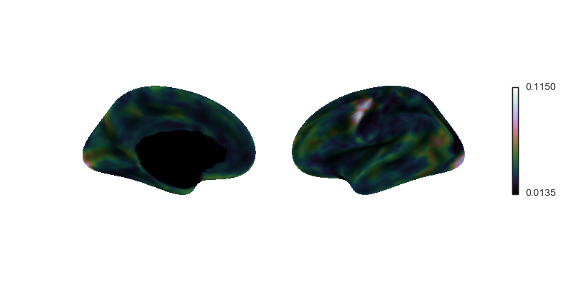


95, rh


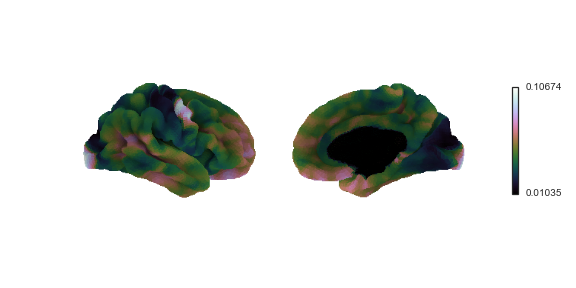


95, rh


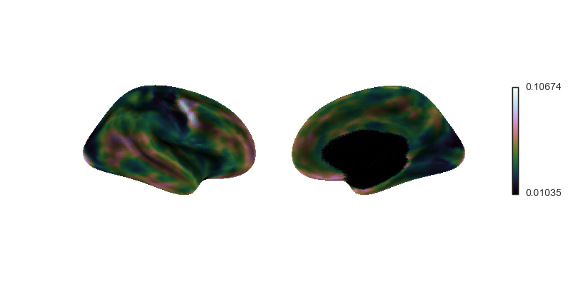


95, lh


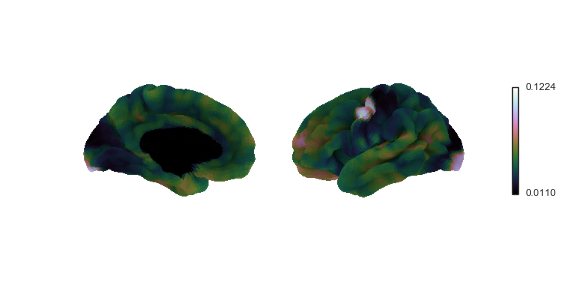


95, lh


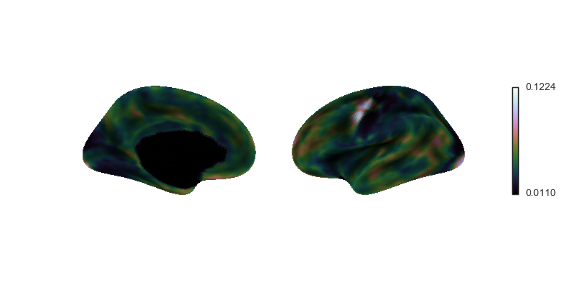


98, rh


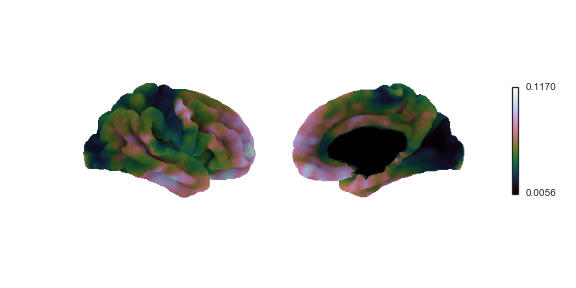


98, rh


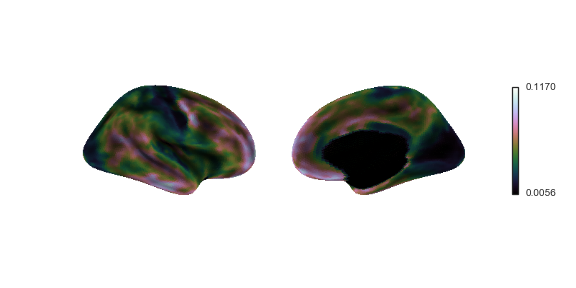


98, lh


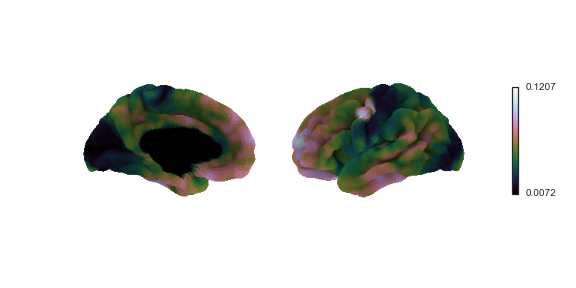


98, lh


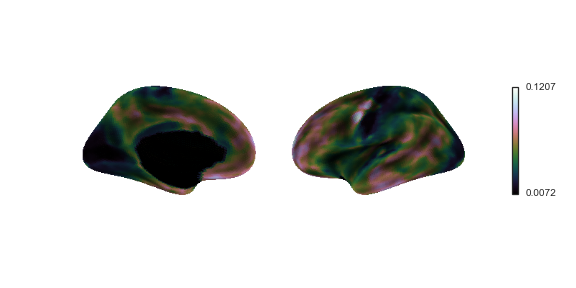

In [11]:
for thr in [75, 80, 85, 90, 95, 98]:
    for hemi in ['rh', 'lh']:
        for surf in ['pial', 'inflated']:
            print '\n%s, %s' % (thr, hemi)
            
            data = np.array(df['mean distance - standard deviation across subjects'][
                    (df['threshold'] == str(thr)) & (df['hemisphere'] == hemi)])
            create_fig(data, hemi, surf=surf, cmap='cubehelix')
